# Given

A Heart Failure Prediction Dataset from Kaggle

# Find 

One-hot encode the dataset
* Implement a decision tree using SKLearn. Explore accuracy depending on:
    * min depth
    * min tree cnt
* Implement Random Forest using SKLearn
* Implement XTGBoost

# Solution

In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

import graphviz

RANDOM_STATE = 55

In [107]:
data = pd.read_csv("./Lab10_data.csv", delimiter=",")
data.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


One-hot encode the categorical values

In [108]:
data_one_hot = pd.get_dummies(data, columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"])

x = data_one_hot.drop(columns="HeartDisease")
y = data_one_hot[["HeartDisease"]]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.8)

### SKLearn DecisionTreeClassifier

In [109]:
min_samples_split = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth = [1, 2, 3, 4, 8, 16, 32, 64, None]

Sampling with replacement 
- the <i>min_samples_split</i> parameter stops a node from being split if there are less than <i>min_samples_split</i> samples in that node

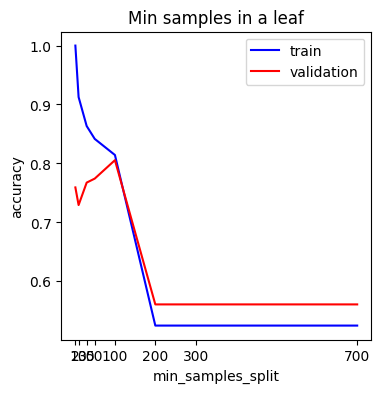

In [110]:
accuracy = [] # [train, val]

for sample in min_samples_split:

    tree_instance = DecisionTreeClassifier(min_samples_split=sample, random_state=RANDOM_STATE)

    tree_instance.fit(x_train, y_train)

    prediction = tree_instance.predict(x_train)
    acc1 = accuracy_score(y_train, prediction)

    prediction = tree_instance.predict(x_val)
    acc2 = accuracy_score(y_val, prediction)

    accuracy.append([acc1, acc2])

accuracy = np.array(accuracy)


fig, ax = plt.subplots(figsize = (4,4))
ax.plot(min_samples_split, accuracy[:,0], c='b', label="train")
ax.plot(min_samples_split, accuracy[:,1], c='r', label="validation")
ax.set_xticks(min_samples_split)
ax.set_xlabel("min_samples_split")
ax.set_ylabel("accuracy")
plt.title("Min samples in a leaf")
plt.legend()

Tree depth

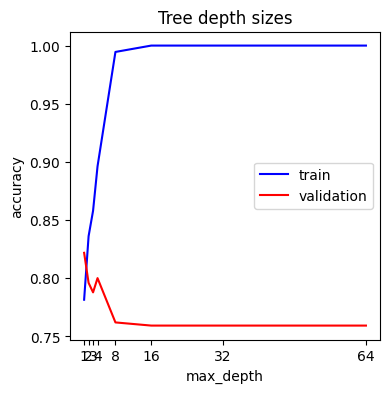

In [111]:
accuracy = [] # [train, val]

for depth in max_depth:

    tree_instance = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)

    tree_instance.fit(x_train, y_train)

    prediction = tree_instance.predict(x_train)
    acc1 = accuracy_score(y_train, prediction)

    prediction = tree_instance.predict(x_val)
    acc2 = accuracy_score(y_val, prediction)

    accuracy.append([acc1, acc2])

accuracy = np.array(accuracy)



fig, ax = plt.subplots(figsize = (4,4))
ax.plot(max_depth, accuracy[:,0], c='b', label="train")
ax.plot(max_depth, accuracy[:,1], c='r', label="validation")
ax.set_xticks(ticks=max_depth[:-1])
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
plt.title("Tree depth sizes")
plt.legend()

Best tree

Metrics train: 
	 Accuracy score: 0.8415
Metrics validation: 
	 Accuracy score: 0.7741


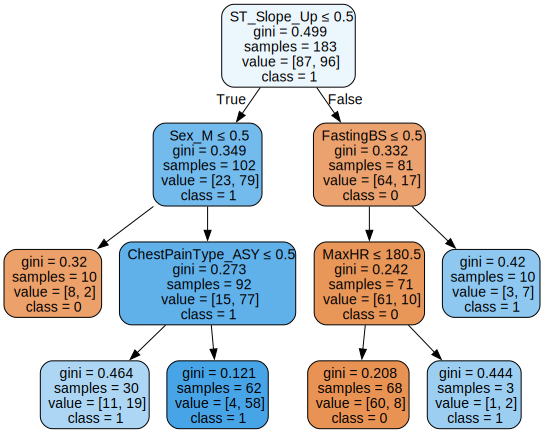

In [112]:
best_tree = DecisionTreeClassifier(min_samples_split=50, max_depth=3)

best_tree.fit(x_train, y_train)

print(f"Metrics train: \n\t Accuracy score: {accuracy_score(best_tree.predict(x_train),y_train):.4f}")
print(f"Metrics validation: \n\t Accuracy score: {accuracy_score(best_tree.predict(x_val),y_val):.4f}")

# generate a plot of the decision tree
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                     feature_names=np.array(x.columns),  
                     class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

### Random Forest - SKLearn RandomForestClassifier

Min_sample_split

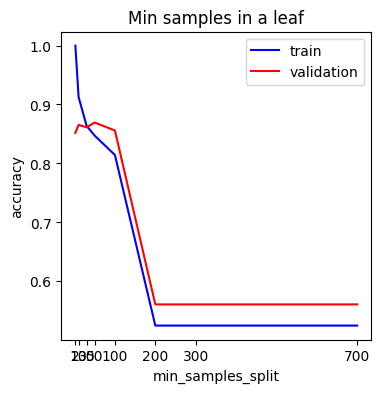

In [113]:
accuracy = [] # [train, val]

for sample in min_samples_split:

    tree_instance = RandomForestClassifier(min_samples_split=sample, random_state=RANDOM_STATE)

    tree_instance.fit(x_train, y_train.values.ravel())

    prediction = tree_instance.predict(x_train)
    acc1 = accuracy_score(y_train, prediction)

    prediction = tree_instance.predict(x_val)
    acc2 = accuracy_score(y_val, prediction)

    accuracy.append([acc1, acc2])

accuracy = np.array(accuracy)


fig, ax = plt.subplots(figsize = (4,4))
ax.plot(min_samples_split, accuracy[:,0], c='b', label="train")
ax.plot(min_samples_split, accuracy[:,1], c='r', label="validation")

ax.set_xticks(min_samples_split)
ax.set_xticklabels(min_samples_split)
ax.set_xlabel("min_samples_split")
ax.set_ylabel("accuracy")
plt.title("Min samples in a leaf")
plt.legend()

Max_depth

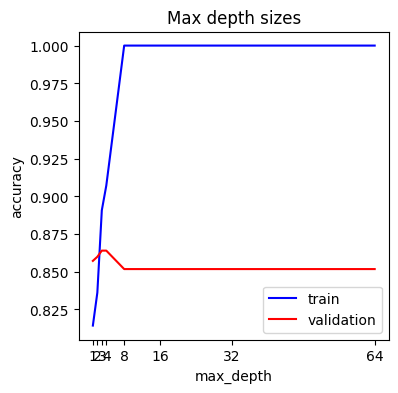

In [114]:
accuracy = [] # [train, val]

for depth in max_depth:

    tree_instance = RandomForestClassifier(max_depth=depth, random_state=RANDOM_STATE)

    tree_instance.fit(x_train, y_train.values.ravel())

    prediction = tree_instance.predict(x_train)
    acc1 = accuracy_score(y_train, prediction)

    prediction = tree_instance.predict(x_val)
    acc2 = accuracy_score(y_val, prediction)

    accuracy.append([acc1, acc2])

accuracy = np.array(accuracy)



fig, ax = plt.subplots(figsize = (4,4))
ax.plot(max_depth, accuracy[:,0], c='b', label="train")
ax.plot(max_depth, accuracy[:,1], c='r', label="validation")

ax.set_xticks(max_depth[:-1])
ax.set_xticklabels(max_depth[:-1])
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")
plt.title("Max depth sizes")
plt.legend()

N_estimators

In [115]:
n_estimators = [10, 50, 100, 500, 1000]

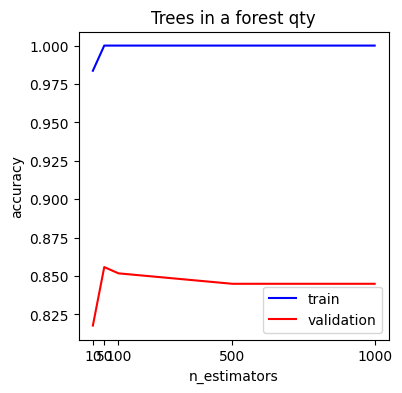

In [116]:
accuracy = [] # [train, val]

for estimator in n_estimators:

    tree_instance = RandomForestClassifier(n_estimators=estimator, random_state=RANDOM_STATE)

    tree_instance.fit(x_train, y_train.values.ravel())

    prediction = tree_instance.predict(x_train)
    acc1 = accuracy_score(y_train, prediction)

    prediction = tree_instance.predict(x_val)
    acc2 = accuracy_score(y_val, prediction)

    accuracy.append([acc1, acc2])

accuracy = np.array(accuracy)



fig, ax = plt.subplots(figsize = (4,4))
ax.plot(n_estimators, accuracy[:,0], c='b', label="train")
ax.plot(n_estimators, accuracy[:,1], c='r', label="validation")
ax.set_xticks(ticks=n_estimators)
ax.set_xlabel("n_estimators")
ax.set_ylabel("accuracy")
plt.title("Trees in a forest qty")
plt.legend()

Best Forest

In [117]:
best_forest = RandomForestClassifier(n_estimators = 500,
                                             max_depth = 3,
                                             min_samples_split = 10).fit(x_train,y_train.values.ravel())

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(best_forest.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(best_forest.predict(x_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8852
Metrics test:
	Accuracy score: 0.8721


### Random Forest - XGBoost

Instead of building uncorrelated trees, XTGBoost focuses every next tree on fails in previous tree predictions.
* XTGBooost uses same parameters with additional learning rate $\lambda$

In [118]:
import xgboost as xgb

In [119]:
xgboost = xgb.XGBClassifier(learning_rate = 0.1, 
                            n_estimators=500,
                            verbosity=1,
                            early_stopping_rounds=10,
                            random_state=RANDOM_STATE)

n = int(len(x_train)*0.8)

x_train_fit, x_train_eval, y_train_fit, y_train_eval = x_train[:n], x_train[n:], y_train[:n], y_train[n:]

xgboost.fit(x_train_fit, y_train_fit, eval_set=[(x_train_eval, y_train_eval)])

[0]	validation_0-logloss:0.67692
[1]	validation_0-logloss:0.65358
[2]	validation_0-logloss:0.62835
[3]	validation_0-logloss:0.60490
[4]	validation_0-logloss:0.59783
[5]	validation_0-logloss:0.58406
[6]	validation_0-logloss:0.57169
[7]	validation_0-logloss:0.56540
[8]	validation_0-logloss:0.56486
[9]	validation_0-logloss:0.55597
[10]	validation_0-logloss:0.54886
[11]	validation_0-logloss:0.54077
[12]	validation_0-logloss:0.53471


[13]	validation_0-logloss:0.53077
[14]	validation_0-logloss:0.52546
[15]	validation_0-logloss:0.52096
[16]	validation_0-logloss:0.52602
[17]	validation_0-logloss:0.52364
[18]	validation_0-logloss:0.51843
[19]	validation_0-logloss:0.51892
[20]	validation_0-logloss:0.51795
[21]	validation_0-logloss:0.51853
[22]	validation_0-logloss:0.51492
[23]	validation_0-logloss:0.51919
[24]	validation_0-logloss:0.52679
[25]	validation_0-logloss:0.53158
[26]	validation_0-logloss:0.52905
[27]	validation_0-logloss:0.53179
[28]	validation_0-logloss:0.52864
[29]	validation_0-logloss:0.53306
[30]	validation_0-logloss:0.53900
[31]	validation_0-logloss:0.53825
[32]	validation_0-logloss:0.54329


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [120]:
xgboost.best_iteration

22

In [121]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgboost.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgboost.predict(x_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9235
Metrics test:
	Accuracy score: 0.8054


Comparison

| Model         | Accuracy (Train Set)  | Accuracy (Test Set) |
| ------------- | -----------------     | -----------------   |
| DecisionTree  |     0.8689           |    0.8082           |
| RandomForest (searching best fit)  |     0.9016           |    0.8558           |
| XGBoost       |     0.9617           |    0.8068           |